# Análise exploratória de dados

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean
sns.set_theme()

## 1.Coleta de dados

In [104]:
#Carregar dataset Attention
attention = sns.load_dataset("attention")
attention.head()
attention.to_csv("../data/raw/data.csv", index=False)

## 2.Dicionário de dados

In [105]:
#Pesquisar colunas do attention
attention.columns

Index(['Unnamed: 0', 'subject', 'attention', 'solutions', 'score'], dtype='object')

In [106]:
#Primeira 5 linhas do dataset
attention.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


In [107]:
#Criando o dicionário de dados
dicionario = pd.DataFrame([
    {
        "variavel": "Unnamed:0",
        "descricao": "Igual ao índice",
        "tipo":"Quantitativa",# Em maisculo para não agregar na variável quantitativa
        "subtipo":"Discreta"
    },{
        "variavel": "subject",
        "descricao": "O id dos indivíduos, de 1 a 20",
        "tipo":"quantitativa",
        "subtipo":"discreta"
    },{
        "variavel": "attention",
        "descricao": " O tipo de atenção do individuo enquanto realizava o problema, variando entre dividido e focado ",
        "tipo":"qualitativa",
        "subtipo":"ordinal"
    },{
        "variavel": "solutions",
        "descricao": "Número de soluções possíveis do problema, de 1 a 3",
        "tipo":"quantitativa",
        "subtipo":"discreta"
    },{
        "variavel": "score",
        "descricao": "A pontução do indivído",
        "tipo":"quantitativa",
        "subtipo": "continua" 
    }
])

dicionario

,variavel,descricao,tipo,subtipo
0,Unnamed:0,Igual ao índice,Quantitativa,Discreta
1,subject,"O id dos indivíduos, de 1 a 20",quantitativa,discreta
2,attention,O tipo de atenção do individuo enquanto reali...,qualitativa,ordinal
3,solutions,"Número de soluções possíveis do problema, de 1...",quantitativa,discreta
4,score,A pontução do indivído,quantitativa,continua


In [108]:
#Atribuindo a coluna a uma variavel
quantitativa = dicionario[dicionario['tipo']== 'quantitativa'].variavel.tolist()
qualitativa = dicionario[dicionario['tipo']== 'qualitativa'].variavel.tolist()

In [109]:
#Testando a qualitativa
attention[qualitativa].head()

,attention
0,divided
1,divided
2,divided
3,divided
4,divided


In [110]:
#Testando a quantitativa
attention[quantitativa].head()

,subject,solutions,score
0,1,1,2.0
1,2,1,3.0
2,3,1,3.0
3,4,1,5.0
4,5,1,4.0


In [111]:
dicionario.to_csv('../data/external/dicionario.csv', index=False)

## 2.1.Descrição dos dados

In [112]:
dicionario

,variavel,descricao,tipo,subtipo
0,Unnamed:0,Igual ao índice,Quantitativa,Discreta
1,subject,"O id dos indivíduos, de 1 a 20",quantitativa,discreta
2,attention,O tipo de atenção do individuo enquanto reali...,qualitativa,ordinal
3,solutions,"Número de soluções possíveis do problema, de 1...",quantitativa,discreta
4,score,A pontução do indivído,quantitativa,continua


 - São 5 variáveis, 3 quantitativa discreta, 1 quantitativa discreta e 1 qualitativa

In [113]:
#Descobrindo a quantidade de linhas e colunas do dataset
attention.shape

(60, 5)

In [114]:
#Informações sobre gerais do dataset como tipo das colunas
attention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60 non-null     int64  
 1   subject     60 non-null     int64  
 2   attention   60 non-null     object 
 3   solutions   60 non-null     int64  
 4   score       60 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.5+ KB


## 3.Perguntas de partida e hipóteses

 - Existe dados faltantes, se sim quantos e em quais variáveis?
 - Qual a comparação de notas entre os individuos com tipos diferentes de focos?
 - Qual a distribuição dos dados (variável por variável)?
 - Qual a média e a moda de score?

### Existe dados faltantes, se sim quantos e em quais variáveis?

In [115]:
#Procurando a quantidade de valores faltantes
attention.isnull().sum() #Não há valores faltantes

Unnamed: 0    0
subject       0
attention     0
solutions     0
score         0
dtype: int64

### Qual a comparação de notas entre os individuos com tipos diferentes de focos?

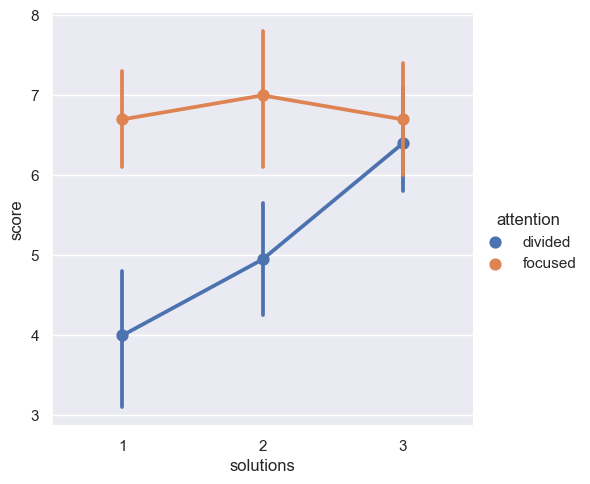

In [116]:
sns.catplot(data=attention, x="solutions", y="score", hue="attention", kind="point")

- Podemos chegar a conclusao de que maneira geral aqueles que tiveram foco obtiveram notas(score) mais altos do que aqueles com atenção dividida

### Qual a distribuição dos dados (variável por variável)?

(array([ 2.,  3.,  3.,  1., 14., 15.,  0., 10., 10.,  2.]),
 array([2. , 2.7, 3.4, 4.1, 4.8, 5.5, 6.2, 6.9, 7.6, 8.3, 9. ]),
 <BarContainer object of 10 artists>)

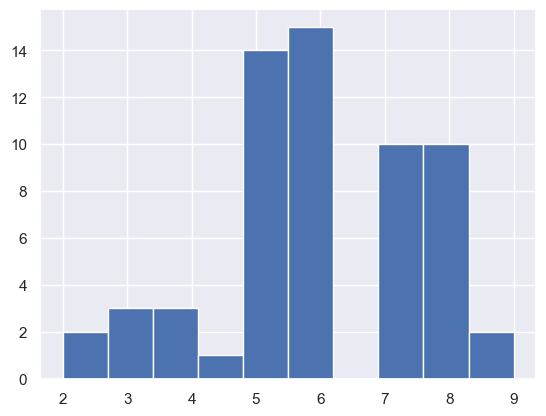

In [117]:
#Histograma da coluna score
plt.hist(attention.score)

### Qual a média e a mode de score?

In [118]:
attention['score'].describe()

count    60.000000
mean      5.958333
std       1.621601
min       2.000000
25%       5.000000
50%       6.000000
75%       7.000000
max       9.000000
Name: score, dtype: float64

## 4.Insights

Através da análise do dataset,e a utilização do dicionário é possível concluir:
 - Foi um experimento que utilizou 20 individuos
 - Classificou o tipo de atenção dos individuos em focado e dividida
 - Utlizou problema/questão para tirar parametros
 - Não há valores faltantes
 - A moda da coluna score é 6
 - A media de score é aproximadamente 6